### __*Install packages, Imports, DataFrame*__

In [16]:

from torchmetrics import SymmetricMeanAbsolutePercentageError, MeanSquaredError, MeanAbsoluteError


import torch

from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)

from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    VARIMA,
)

from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset, ElectricityDataset

import logging

logging.disable(logging.CRITICAL)

import warnings

warnings.filterwarnings("ignore")


%matplotlib inline

import numpy as np

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)


In [17]:
# testing

import pandas as pd

import datetime as dt
import matplotlib.pyplot as plt

from darts import TimeSeries
from sklearn.preprocessing import MinMaxScaler


from darts.utils.missing_values import fill_missing_values

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler, StandardScaler
from crypto_assist.data_preprocess import preprocessor_not_scaled


In [1]:
df = preprocessor_not_scaled('BTCUSDT_daily_Binance.csv','final_text_df.csv','social_number_data.csv','FearAndGreedIndex.csv')


NameError: name 'preprocessor_not_scaled' is not defined

In [19]:
df


,date,open,high,low,close,volume BTC,volume USD,FAGI_score,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day,FAGI_sentiment_encoded
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,50.0,0.000000,0.000000,0.000000,1.000000e+03,2163.435644,1.000000e+03,1747.715439,699.824346,2.0
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,50.0,0.000000,0.000000,0.000000,2.209748e+03,2163.435644,1.419855e+03,1747.715439,699.824346,2.0
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,50.0,0.000000,0.000000,0.000000,3.419496e+03,2163.435644,1.839711e+03,1747.715439,699.824346,2.0
3,2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,50.0,0.000000,0.000000,0.000000,4.629243e+03,2163.435644,2.259566e+03,1747.715439,699.824346,2.0
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,50.0,0.000000,0.000000,0.000000,5.838991e+03,2163.435644,2.679422e+03,1747.715439,699.824346,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,0.858534,0.957825,0.908179,3.171432e+06,2163.435644,2.593963e+06,794.000000,107.410000,3.0
2293,2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,0.684048,0.937447,0.810748,3.171829e+06,2163.435644,2.594931e+06,760.000000,102.060000,3.0
2294,2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,0.640768,0.311340,0.476054,3.172244e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0
2295,2023-11-29,37818.88,38450.00,37570.00,37854.64,32994.191070,1.252587e+09,72.0,0.676125,0.648727,0.662426,3.172934e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0


In [20]:
df.index = pd.to_datetime(df.date)


In [21]:
df.drop(columns="date",inplace=True)


In [22]:
df


,open,high,low,close,volume BTC,volume USD,FAGI_score,scored_title,scored_text,average_score,twitter_followers,twitter_favourites,reddit_subscribers,reddit_active_users,reddit_comments_per_day,FAGI_sentiment_encoded
date,,,,,,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,50.0,0.000000,0.000000,0.000000,1.000000e+03,2163.435644,1.000000e+03,1747.715439,699.824346,2.0
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,50.0,0.000000,0.000000,0.000000,2.209748e+03,2163.435644,1.419855e+03,1747.715439,699.824346,2.0
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,50.0,0.000000,0.000000,0.000000,3.419496e+03,2163.435644,1.839711e+03,1747.715439,699.824346,2.0
2017-08-20,4139.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,50.0,0.000000,0.000000,0.000000,4.629243e+03,2163.435644,2.259566e+03,1747.715439,699.824346,2.0
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,50.0,0.000000,0.000000,0.000000,5.838991e+03,2163.435644,2.679422e+03,1747.715439,699.824346,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-26,37780.67,37814.63,37150.00,37447.43,21264.537230,7.973212e+08,73.0,0.858534,0.957825,0.908179,3.171432e+06,2163.435644,2.593963e+06,794.000000,107.410000,3.0
2023-11-27,37447.42,37569.23,36707.00,37242.70,30001.073760,1.112557e+09,66.0,0.684048,0.937447,0.810748,3.171829e+06,2163.435644,2.594931e+06,760.000000,102.060000,3.0
2023-11-28,37242.70,38377.00,36868.41,37818.87,37544.466670,1.414360e+09,68.0,0.640768,0.311340,0.476054,3.172244e+06,2163.435644,2.594931e+06,1747.715439,699.824346,3.0


### __*Scaling and Converting the data*__

In [23]:
#freq: This parameter defines the frequency or time interval between consecutive data points in the time series.
#'D': It means that each data point in the time series corresponds to an hour

timeseries = TimeSeries.from_dataframe(df, freq='D')


In [24]:
# Here we are converting the MinMax scaler to a Time Series version of it

from darts.dataprocessing.transformers.scaler import Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ts_scaler = Scaler(scaler)
ts_scaler_target = Scaler(scaler)


In [25]:

scaled_df = ts_scaler.fit_transform(timeseries)
ts_scaler_target = ts_scaler_target.fit(timeseries["close"])


### __*Cleaning Missing data*__

In [26]:
from darts.utils.missing_values import fill_missing_values
scaled_df = fill_missing_values(scaled_df)
scaled_df


<TimeSeries (DataArray) (date: 2297, component: 16, sample: 1)>
array([[[0.0166849 ],
        [0.01839357],
        [0.02182369],
        ...,
        [0.2445421 ],
        [0.14865773],
        [0.5       ]],

       [[0.01705172],
        [0.01666101],
        [0.01769203],
        ...,
        [0.2445421 ],
        [0.14865773],
        [0.5       ]],

       [[0.01430512],
        [0.01381835],
        [0.01629199],
        ...,
...
        ...,
        [0.2445421 ],
        [0.14865773],
        [0.75      ]],

       [[0.53826622],
        [0.53517387],
        [0.54810789],
        ...,
        [0.2445421 ],
        [0.14865773],
        [0.75      ]],

       [[0.53882219],
        [0.53054615],
        [0.54700388],
        ...,
        [0.2445421 ],
        [0.14865773],
        [0.75      ]]])
Coordinates:
  * date       (date) datetime64[ns] 2017-08-17 2017-08-18 ... 2023-11-30
  * component  (component) object 'open' 'high' ... 'FAGI_sentiment_encoded'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### __*Train Test Split*__

<Axes: xlabel='date'>

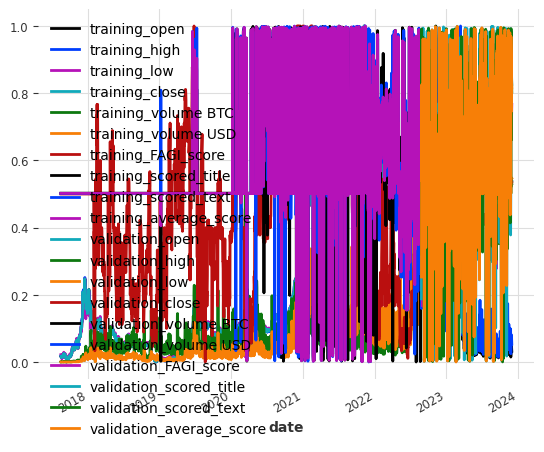

In [27]:
train, val = (scaled_df).split_before(0.8)
train.plot(label="training")
val.plot(label="validation")


### __*Setup Earlystopping and the train on GPU*__

In [28]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# stop training when validation loss does not decrease more than 0.05 (`min_delta`) over
# a period of 5 epochs (`patience`)
stopper = EarlyStopping(
    monitor="val_loss",
    patience=30,
    min_delta=0.005,
    mode='min',
)

"""pl_trainer_kwargs={"callbacks": [stopper],
                   "accelerator": "gpu",
                   "devices": [0]}"""


'pl_trainer_kwargs={"callbacks": [stopper],\n                   "accelerator": "gpu",\n                   "devices": [0]}'

### __*Instanciate our model*__

In [29]:
# predict 15 days considering the latest 45 days

model_covariates = BlockRNNModel(
    model="LSTM",
    input_chunk_length=150,
    output_chunk_length=30,
    #dropout=0.2,
    torch_metrics= SymmetricMeanAbsolutePercentageError(),
    n_epochs=100,
    #pl_trainer_kwargs = pl_trainer_kwargs,
    random_state=0,
)


### __*TransformerModel model*__

In [ ]:
"""

model = TransformerModel(
    input_chunk_length=6,
    output_chunk_length=6,
    n_epochs=20
)
"""


In [ ]:
"""
model.fit(target, past_covariates=past_cov)
pred = model.predict(6)
pred.values()
"""
"""


### __*XGBModel!!*__

In [ ]:
"""
model = XGBModel(
    lags=150,
    lags_past_covariates=150,
    lags_future_covariates=[0,1,2,3,4,5],
    output_chunk_length=6,
)

model.fit(val["close"], past_covariates=, future_covariates=)
pred = model.predict(6)
pred.values()
"""


### __*Train the model*__

In [30]:
model_covariates.fit(
    series=[train["close"]],    # the target training data
    past_covariates=train,     # the multi covariate features training data
    val_series=[val["close"]],  # the target validation data
    val_past_covariates=val,   # the multi covariate features validation data
    verbose=True,
)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

BlockRNNModel(model=LSTM, hidden_dim=25, n_rnn_layers=1, hidden_fc_sizes=None, dropout=0.0, input_chunk_length=150, output_chunk_length=30, torch_metrics=SymmetricMeanAbsolutePercentageError(), n_epochs=100, random_state=0)

### __*Do a prediction*__

Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

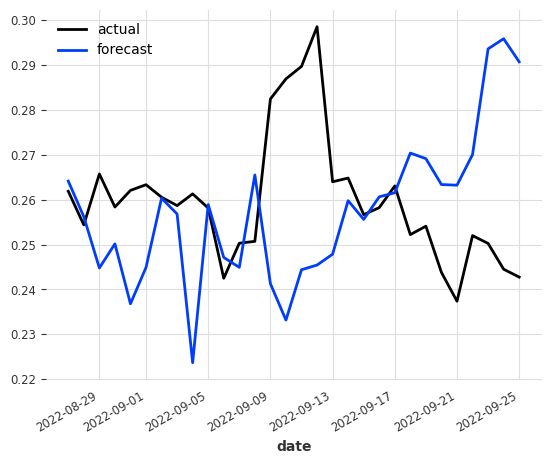

In [34]:
pred_cov = model_covariates.predict(n=30,                        # n of days to predict
                                 series=train["close"][-150:],       # target input for prediction
                                 past_covariates=train[-150:]) # past-covariates input for prediction

val[:30]["close"].plot(label="actual")
pred_cov.plot(label="forecast")


### __*Result of the metrics*__

In [35]:
# check the SMAPE error

smape(val['close'][:30], pred_cov)


7.67949251351165

### __*Turn Prediction into original scale*__

In [33]:
ts_scaler_target.inverse_transform(pred_cov).values()


array([[20182.7538386 ],
       [19672.18058259],
       [18937.99631792],
       [19283.5989253 ],
       [18424.52135494],
       [18945.64750093],
       [19937.92115896],
       [19711.33388587],
       [17579.94003668],
       [19847.24483525],
       [19089.24448764],
       [18946.93490671],
       [20270.95917503],
       [18713.083628  ],
       [18190.99600473],
       [18912.84807791],
       [18979.76876466],
       [19135.41884206],
       [19902.76502252],
       [19634.2973998 ],
       [19957.7048654 ],
       [20016.05784097],
       [20585.1031915 ],
       [20505.2418192 ],
       [20133.90219704],
       [20124.51553891],
       [20563.10378479],
       [22078.03494084],
       [22223.71077989],
       [21892.53629903]])